In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
restaurant = pd.read_csv("restaurant.csv")
print(restaurant.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [7]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
restaurant.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
restaurant.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
restaurant.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Task 1: Restaurant Ratings

## Analyze the distribution of aggregate ratings and determine the most common rating rangee.

In [13]:
rating_counts = restaurant['Aggregate rating'].value_counts()

In [14]:
print("rating_counts:")
for rating, count in sorted(rating_counts.items()):
    print(f"{rating} stars: {count}")

rating_counts:
0.0 stars: 2148
1.8 stars: 1
1.9 stars: 2
2.0 stars: 7
2.1 stars: 15
2.2 stars: 27
2.3 stars: 47
2.4 stars: 87
2.5 stars: 110
2.6 stars: 191
2.7 stars: 250
2.8 stars: 315
2.9 stars: 381
3.0 stars: 468
3.1 stars: 519
3.2 stars: 522
3.3 stars: 483
3.4 stars: 498
3.5 stars: 480
3.6 stars: 458
3.7 stars: 427
3.8 stars: 400
3.9 stars: 335
4.0 stars: 266
4.1 stars: 274
4.2 stars: 221
4.3 stars: 174
4.4 stars: 144
4.5 stars: 95
4.6 stars: 78
4.7 stars: 42
4.8 stars: 25
4.9 stars: 61


In [15]:
max_aggregate_rating = rating_counts.idxmax()
highest_count = rating_counts.max()
print(f"\nThe most common rating is {max_aggregate_rating} stars with {highest_count} occurrences.")


The most common rating is 0.0 stars with 2148 occurrences.


## Calculate the average number of votes received by restaurants.


In [17]:
total_votes = restaurant['Votes'].value_counts()

In [18]:
total_restaurants = len('Votes')

In [19]:
average_votes_per_restaurant = total_votes / total_restaurants

In [20]:
print(f"The average number of votes received by restaurants is {average_votes_per_restaurant}.")

The average number of votes received by restaurants is Votes
0       218.8
1        96.6
2        65.4
3        48.8
4        41.4
        ...  
517       0.2
1147      0.2
513       0.2
791       0.2
656       0.2
Name: count, Length: 1012, dtype: float64.


# Task 2: Cuisine Combination

In [21]:
# identify the most common combinations of cuisines in the dataset
restaurant.dropna(subset=['Cuisines'], inplace=True)

restaurant['Cuisine'] = restaurant['Cuisines'].apply(lambda x: sorted(x.strip().split(',')))

restaurant['Cuisine'] = restaurant['Cuisines'].apply(tuple)

cuisine_combination_counts = restaurant['Cuisines'].value_counts()

print("Most common combinations of cuisines:")
print(cuisine_combination_counts.head())

Most common combinations of cuisines:
Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64


In [24]:
restaurant.dropna(subset=['Cuisines'], inplace=True)
restaurant['Cuisine'] = restaurant['Cuisines'].apply(lambda x: sorted(x.strip().split(',')))
restaurant['Cuisine'] = restaurant['Cuisines'].apply(tuple)
average_rating_by_combination = restaurant.groupby('Cuisines')['Aggregate rating'].mean()
sorted_cuisines = average_rating_by_combination.sort_values(ascending=False)
print("Cuisines with high ratings:")
print(sorted_cuisines.head(20))

Cuisines with high ratings:
Cuisines
American, Coffee and Tea           4.90
American, BBQ, Sandwich            4.90
Burger, Bar Food, Steak            4.90
Sunda, Indonesian                  4.90
Mughlai, Lucknowi                  4.90
European, German                   4.90
European, Contemporary             4.90
European, Asian, Indian            4.90
Italian, Deli                      4.90
American, Sandwich, Tea            4.90
American, Burger, Grill            4.90
American, Caribbean, Seafood       4.90
Mexican, American, Healthy Food    4.90
BBQ, Breakfast, Southern           4.90
Italian, Bakery, Continental       4.90
Hawaiian, Seafood                  4.90
Continental, Indian                4.90
World Cuisine                      4.90
Filipino, Mexican                  4.85
Contemporary, Italian              4.80
Name: Aggregate rating, dtype: float64


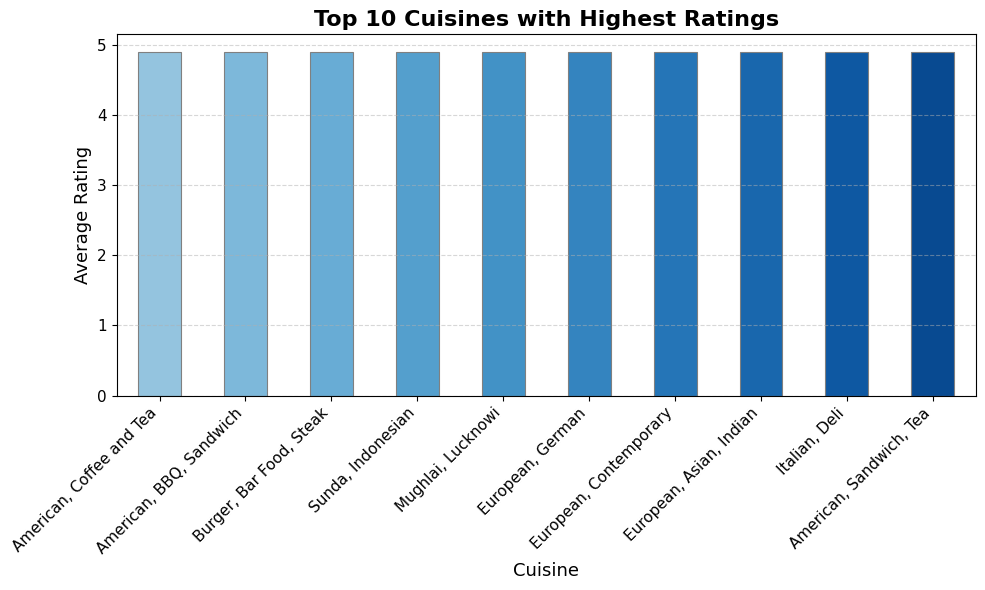

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
blue_tones = plt.cm.Blues(np.linspace(0.4, 0.9, 10))
sorted_cuisines.head(10).plot(kind='bar', color=blue_tones, edgecolor='gray', linewidth=0.8)
plt.title('Top 10 Cuisines with Highest Ratings', fontsize=16, weight='bold')
plt.xlabel('Cuisine', fontsize=13)
plt.ylabel('Average Rating', fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Task 3: Geographical Analysis

In [31]:
pip install cartopy

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.9 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.0 MB 2.1 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/11.0 MB 2.3 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.0 MB 2.5 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.0 MB 2.8 MB/s eta 0:00:03
   -------------- ------------------------- 3.9/11.0 MB 2.9 MB/s eta 0:00:03
   ------------------ --------------------- 5.0/11.0 MB 3.2 MB/s eta 0:00:02
   ---------------------- ----------------- 6.0/11.0 MB 3.4 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.0 MB 3.3 MB/s eta 0:00:02
   --------------------------- ------------ 7.6/11.0 MB 3.5 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.0 MB 3.6 MB/s eta 0:00:01
   ----------

c:\Users\YOCHANA\AppData\Local\Programs\Python\Python313\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


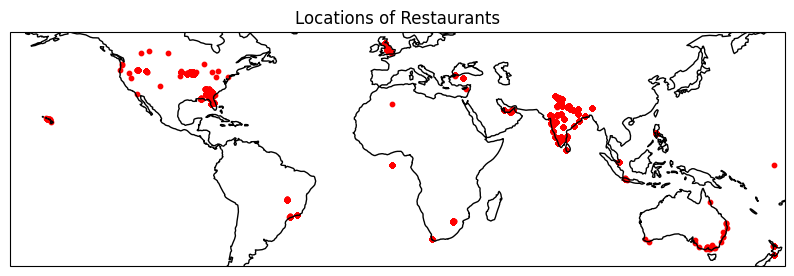

In [32]:
#Plot the locations of restaurants on a map using longitude and latitude coordinates.
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
restaurant.dropna(subset=['Latitude', 'Longitude'], inplace=True)
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.scatter(restaurant['Longitude'], restaurant['Latitude'], color='red', marker='o', s=10, transform=ccrs.PlateCarree())
ax.coastlines()
plt.title('Locations of Restaurants')
plt.show()

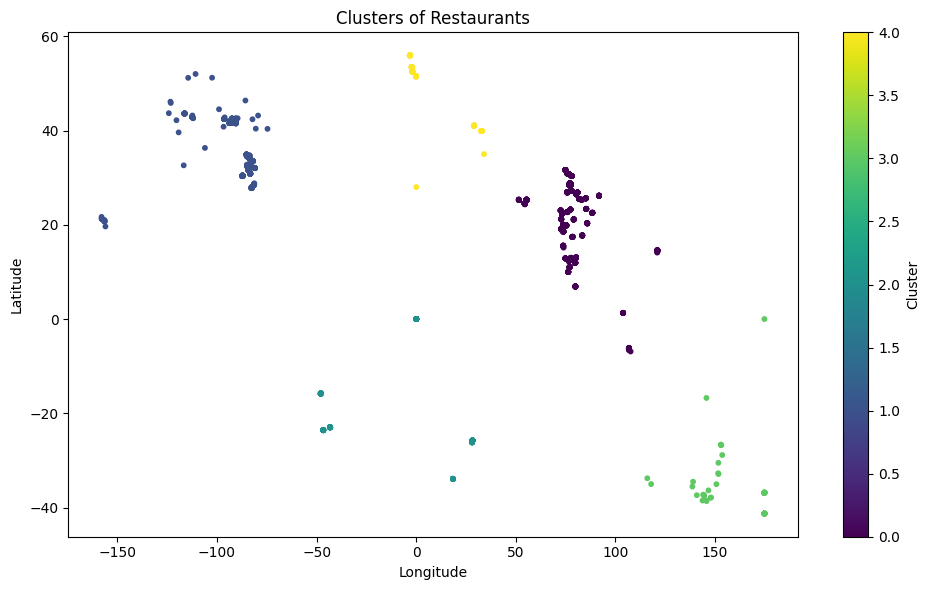

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

restaurant = pd.read_csv("restaurant.csv")
restaurant.dropna(subset=['Latitude', 'Longitude'], inplace=True)

X = restaurant[['Latitude', 'Longitude']]
k = 5

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
restaurant['cluster'] = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    restaurant['Longitude'], restaurant['Latitude'],
    c=restaurant['cluster'], cmap='viridis', s=10
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Restaurants')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


# Task 4: Restaurant Chains

In [7]:
# Identify if there are any restaurant chains present in the dataset.
restaurant_names = restaurant['Restaurant Name']
restaurant_name_counts = restaurant_names.value_counts()
chains = restaurant_name_counts[restaurant_name_counts > 1]
print("Potential restaurant chains:")
print(chains)

Potential restaurant chains:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
San Carlo            2
Gymkhana             2
Dishoom              2
Timboo Cafe          2
D�_vero��lu          2
Name: count, Length: 734, dtype: int64


In [8]:
# Analyze the ratings and popularity of different restaurant chains.
restaurant_names = restaurant['Restaurant Name']
restaurant_name_counts = restaurant_names.value_counts()
chains = restaurant_name_counts[restaurant_name_counts > 1].index.tolist()
chain_dataframes = []
for chain in chains:
    chain_data = restaurant[restaurant['Restaurant Name'] == chain]
    average_rating = chain_data['Aggregate rating'].mean()
    total_votes = chain_data['Votes'].sum()
    chain_metrics = pd.DataFrame({'Chain': [chain], 'Average Rating': [average_rating], 'Total Votes': [total_votes]})
    chain_dataframes.append(chain_metrics)
chain_metrics = pd.concat(chain_dataframes, ignore_index=True)
chain_metrics.sort_values(by='Average Rating', ascending=False, inplace=True)
print("Chain-level metrics:")
print(chain_metrics.head(10))

Chain-level metrics:
                         Chain  Average Rating  Total Votes
263           Talaga Sampireun           4.900         5514
423    AB's Absolute Barbecues           4.850         3151
379           Silantro Fil-Mex           4.850         1364
138  AB's - Absolute Barbecues           4.825        13400
320         Naturals Ice Cream           4.800         3094
730                   Gymkhana           4.700          328
416     The Cheesecake Factory           4.650         3010
731                    Dishoom           4.600         1269
426          Garota de Ipanema           4.600           59
105                    Chili's           4.580         8156
